**Persiapan Data**

- Memuat dataset menggunakan Pandas.
- Memeriksa dan membersihkan data (mengatasi nilai hilang dan outlier).
- Mengonversi kolom tanggal menjadi format datetime.

In [2]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('Walmart.csv')

# Mengonversi kolom tanggal dengan format yang benar
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Memeriksa hasil konversi
print(data.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


**Exploratory Data Analysis (EDA)**

- Menganalisis pola musiman dan tren dalam data penjualan.
- Menggunakan visualisasi untuk memahami hubungan antara variabel.

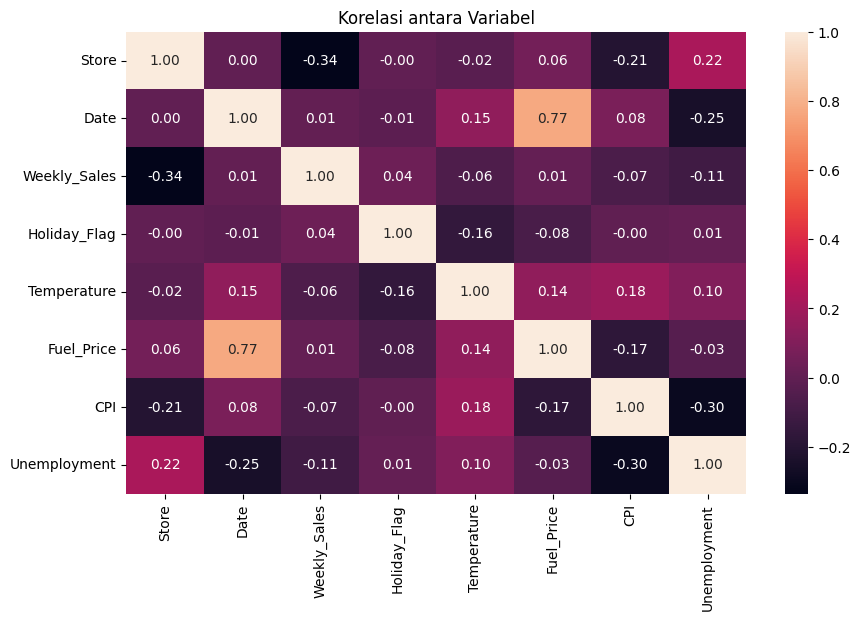

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Korelasi antara Variabel')
plt.show()

**Modeling**

- Menerapkan model ARIMA atau LSTM untuk memprediksi penjualan.
- Melakukan pemisahan data menjadi set pelatihan dan pengujian.

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Mengatur data untuk ARIMA
model = ARIMA(data['Weekly_Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Melakukan prediksi
forecast = model_fit.forecast(steps=12)

**Visualisasi Hasil**

Membuat grafik untuk menunjukkan hasil prediksi penjualan mingguan/bulanan.

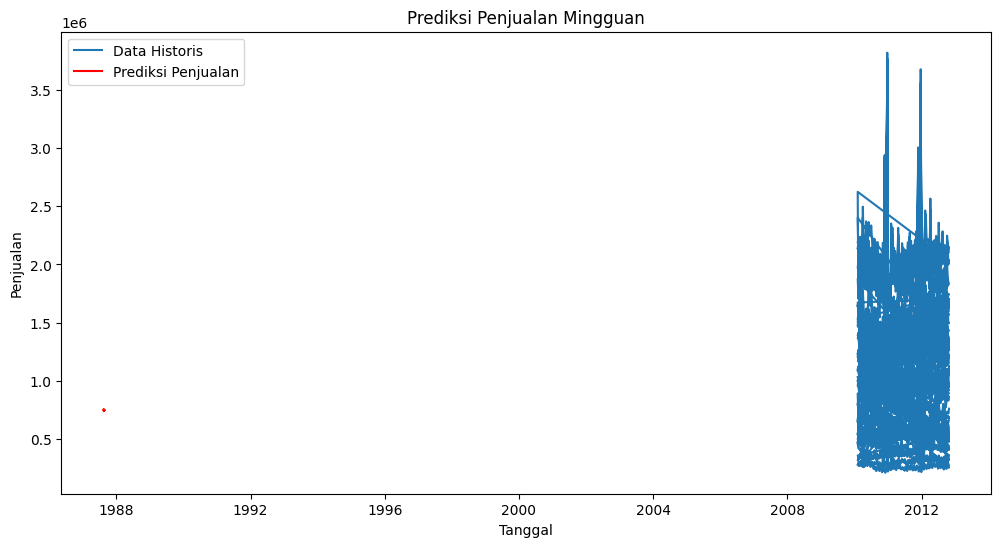

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], label='Data Historis')
plt.plot(forecast.index, forecast, label='Prediksi Penjualan', color='red')
plt.title('Prediksi Penjualan Mingguan')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.show()